In [1]:
"""
For section 1: You need to write your code in order to regenerate the exact result as shown under each question
For section 2: You need to generate the answers based on the questions without having the sample results.

"""

print(__doc__)


For section 1: You need to write your code in order to regenerate the exact result as shown under each question
For section 2: You need to generate the answers based on the questions without having the sample results.




# Section 1

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
#file_to_load = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv("purchase_data.csv")

purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


### Q1 - check for missing data

In [2]:
#purchase_data.count()
purchase_data.isnull().sum()

#Data has zero missing values

Purchase ID    0
SN             0
Age            0
Gender         0
Item ID        0
Item Name      0
Price          0
dtype: int64

## Player Count

### Q2 - Display the total number of players


In [3]:
#Value_counts function is used to get only the unique value
pd.DataFrame({"Total Number of Players" : [len(purchase_data["SN"].value_counts())]})


,Total Number of Players
0,576


### Q3- Purchasing Analysis (Total)

* Obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [4]:
#Getting each desired value
unique_items = purchase_data["Item ID"].nunique()

avg_price = round(purchase_data["Price"].mean(),2)

total_purchase = purchase_data["SN"].count()

total_revenue = purchase_data["Price"].sum()


#Formatting all the data in the dataframe
data = pd.DataFrame({"Unique items":[unique_items], "Average Price":[avg_price],
                     "Total Purchase":[total_purchase] ,"Total Revenue":[total_revenue]})


data["Average Price"] = data["Average Price"].map("${:,.2f}".format)
data["Total Revenue"] = data["Total Revenue"].map("${:,.2f}".format)


data

,Unique items,Average Price,Total Purchase,Total Revenue
0,183,$3.05,780,"$2,379.77"


### Q4- Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [5]:
#purchase_data["SN"].nunique()
#There are 576 unique Players 

#purchase_data["Gender"].unique()
#['Male', 'Other / Non-Disclosed', 'Female']

Total_player = purchase_data["SN"].nunique()

Number_males = purchase_data.groupby(["Gender"]).get_group("Male")["SN"].nunique()
percent_males = round((Number_males/Total_player)*100,2)

Number_females = purchase_data.groupby(["Gender"]).get_group("Female")["SN"].nunique()
percent_females = round((Number_females/Total_player)*100,2)

other = purchase_data.groupby(["Gender"]).get_group("Other / Non-Disclosed")["SN"].nunique()
percent_other = round((other/Total_player)*100,2)


#Creating the Dataframe 
gender_demo = pd.DataFrame({"Count": [Number_males,Number_females,other], "Percent of Total Players": [percent_males,percent_females,percent_other]},
                           index=['Male', 'Female', 'Other / Non-Disclosed'])

gender_demo["Percent of Total Players"] = gender_demo["Percent of Total Players"].map("{:,.2f}%".format)

gender_demo

,Count,Percent of Total Players
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%



### Q5-Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting




In [6]:
#Getting each calculation 
purchase_count = purchase_data.groupby(["Gender"])["Purchase ID"].count()
avg_purchase_price = round(purchase_data.groupby(["Gender"])["Price"].mean(),2)

avg_purchase_bygender = round(purchase_data.groupby(["Gender"])["Price"].sum(),2)

avg_purchase_per_person = round(avg_purchase_bygender / gender_demo["Count"],2)


#Creating a Dataframe to display the result
Purchasing_analysis = pd.DataFrame([purchase_count,avg_purchase_price,avg_purchase_bygender,avg_purchase_per_person]).T
Purchasing_analysis.columns = ["Purchase Count","Average Purchase price","Average Purchase By Gender","Average Purchase Per Person By Gender"] #renaming columns

#Formatting the data
Purchasing_analysis["Purchase Count"] = Purchasing_analysis["Purchase Count"].map("{:,.0f}".format)
Purchasing_analysis["Average Purchase price"] = Purchasing_analysis["Average Purchase price"].map("${:,.2f}".format)
Purchasing_analysis["Average Purchase By Gender"] = Purchasing_analysis["Average Purchase By Gender"].map("${:,.2f}".format)
Purchasing_analysis["Average Purchase Per Person By Gender"] = Purchasing_analysis["Average Purchase Per Person By Gender"].map("${:,.2f}".format)

Purchasing_analysis

,Purchase Count,Average Purchase price,Average Purchase By Gender,Average Purchase Per Person By Gender
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


#### Q6-Display the summary data frame

In [7]:
#calculating field
num_players = purchase_data.groupby(["Gender"])["SN"].nunique()

#creating dataframe
Summary = pd.DataFrame([num_players,purchase_count,avg_purchase_price,avg_purchase_bygender]).T
Summary.columns = ["Number of Players","Purchase Count","Avg Purchase price","Total Revenue"]


Summary["Number of Players"] = Summary["Number of Players"].map("{:,.0f}".format)
Summary["Purchase Count"] = Summary["Purchase Count"].map("{:,.0f}".format)
Summary["Avg Purchase price"] = Summary["Avg Purchase price"].map("${:,.2f}".format)
Summary["Total Revenue"] = Summary["Total Revenue"].map("${:,.2f}".format)

Summary

,Number of Players,Purchase Count,Avg Purchase price,Total Revenue
Gender,,,,
Female,81,113,$3.20,$361.94
Male,484,652,$3.02,"$1,967.64"
Other / Non-Disclosed,11,15,$3.35,$50.19


### Q7- Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [8]:
#Checking the Max and Min Age
purchase_data["Age"].max()
purchase_data["Age"].min()

#Max age is 45 and Min age is 7

#Creating bins and labels 
Bins = [0,9,14,19,24,29,34,39,46]
Labels = ["<10","10-14","15-19","20-24","25-29","30-34","35-39","40+"]
purchase_data["Age Group"] = pd.cut(purchase_data["Age"],bins=Bins,labels=Labels)


#calculating fields
num_players = purchase_data.groupby(["Age Group"])["SN"].nunique()
Total_players = round((num_players/purchase_data["SN"].nunique())*100,2)



#creating dataframe
Age_Demo = pd.DataFrame([num_players , Total_players]).T

Age_Demo.columns = ["Total Count","Percentage of Players"]
Age_Demo["Percentage of Players"] = Age_Demo["Percentage of Players"].map("{:,.2f}%".format)
Age_Demo["Total Count"] = Age_Demo["Total Count"].map("{:,.0f}".format)

Age_Demo

,Total Count,Percentage of Players
Age Group,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


### Q8- Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [9]:
#Checking the Max and Min Age
purchase_data["Age"].max()
purchase_data["Age"].min()

#Max age is 45 and Min age is 7

#Creating bins and labels 
Bins = [0,9,14,19,24,29,34,39,46]
Labels = ["<10","10-14","15-19","20-24","25-29","30-34","35-39","40+"]
purchase_data["Age Group"] = pd.cut(purchase_data["Age"],bins=Bins,labels=Labels)

#Calculating fields
num_players = purchase_data.groupby(["Age Group"])["SN"].count()
Avg_price = purchase_data.groupby(["Age Group"])["Price"].mean()
total_purchase = purchase_data.groupby(["Age Group"])["Price"].sum()

#Creating the dataframe
Age_Demo = pd.DataFrame([num_players , Avg_price, total_purchase]).T
Age_Demo.columns = ["Purchase Count","Average Purchase price","Total Purchase value"]

#Formatting dataframe
Age_Demo["Purchase Count"] = Age_Demo["Purchase Count"].map("{:,.0f}".format)
Age_Demo["Average Purchase price"] = Age_Demo["Average Purchase price"].map("${:,.2f}".format)
Age_Demo["Total Purchase value"] = Age_Demo["Total Purchase value"].map("${:,.2f}".format)


Age_Demo

,Purchase Count,Average Purchase price,Total Purchase value
Age Group,,,
<10,23,$3.35,$77.13
10-14,28,$2.96,$82.78
15-19,136,$3.04,$412.89
20-24,365,$3.05,"$1,114.06"
25-29,101,$2.90,$293.00
30-34,73,$2.93,$214.00
35-39,41,$3.60,$147.67
40+,13,$2.94,$38.24


### Q9-Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [10]:
#calculating fields
purchase_count = purchase_data.groupby(["SN"])["Gender"].count()
avg_purchase_price = round(purchase_data.groupby(["SN"])["Price"].mean(),2)
total_purchase_value = purchase_data.groupby(["SN"])["Price"].sum()

#Creating dataframe
Age_Demo = pd.DataFrame([purchase_count , avg_purchase_price, total_purchase_value]).T

Age_Demo.columns = ["Purchase Count","Average Purchase price","Total Purchase value"]
Age_Demo = Age_Demo.sort_values("Total Purchase value",ascending = False)


#Fromatting dataframe
Age_Demo["Purchase Count"] = Age_Demo["Purchase Count"].map("{:,.0f}".format)
Age_Demo["Average Purchase price"] = Age_Demo["Average Purchase price"].map("${:,.2f}".format)
Age_Demo["Total Purchase value"] = Age_Demo["Total Purchase value"].map("${:,.2f}".format)

Age_Demo.head(5)

,Purchase Count,Average Purchase price,Total Purchase value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


### Q10-Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [11]:
#Creating calculated fields 
purchase_count = purchase_data.groupby(["Item ID", "Item Name"])["Gender"].count()
item_price = purchase_data.groupby(["Item ID", "Item Name"])["Price"].mean()
total_purchase_value = purchase_data.groupby(["Item ID", "Item Name"])["Price"].sum()

#Creating Dataframe
item = pd.DataFrame([purchase_count , item_price, total_purchase_value]).T
item.columns = ["Purchase Count","Item price","Total Purchase value"]
items = item.sort_values("Purchase Count",ascending = False)

#formatting dataframe
items["Purchase Count"] = items["Purchase Count"].map("{:,.0f}".format)
items["Item price"] = items["Item price"].map("${:,.2f}".format)
items["Total Purchase value"] = items["Total Purchase value"].map("${:,.2f}".format)

items.head(5)

,,Purchase Count,Item price,Total Purchase value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


### Q11-Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [12]:
#Sorting the table by "Total Purchase value"
items = item.sort_values("Total Purchase value",ascending=False).head(5)

#formatting dataframe
items["Purchase Count"] = items["Purchase Count"].map("{:,.0f}".format)
items["Item price"] = items["Item price"].map("${:,.2f}".format)
items["Total Purchase value"] = items["Total Purchase value"].map("${:,.2f}".format)

items

,,Purchase Count,Item price,Total Purchase value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80


# Section 2

#### Q12: Import the covid-19 dataset provided and set the state as the index of the dataframe.

In [13]:
#Importing the data and setting state as index column
covid_data = pd.read_csv("us_states_covid19_daily.csv",index_col="state")
covid_data.head()

,death,hospitalized,negative,pending,positive,recovered,total
state,,,,,,,
WY,50,272.0,95212,NaN,5948,4791.0,101160
NE,478,2315.0,410594,NaN,45044,33198.0,455638
ND,191,859.0,219646,NaN,21846,17938.0,241492
NC,3532,NaN,2824239,NaN,210632,184422.0,3034871
MT,180,717.0,330087,NaN,13071,9256.0,343158


#### Q13: Replace all the NaN values in 'pending' column with the string 'None'.

In [14]:
#Replacing all the NaN values to None in pending column
covid_data["pending"] = covid_data["pending"].replace(np.nan,"None")

covid_data["pending"].head(10)

state
WY    None
NE    None
ND    None
NC    None
MT    None
NH    None
MP    None
MO    None
MN    None
MI    None
Name: pending, dtype: object

#### Q14: Replace the isnavalues in the 'hospitalized' columns with the mean value of the column.

In [15]:
#Replacing with mean of column
covid_data["hospitalized"] = covid_data["hospitalized"].replace(np.nan,round(covid_data["hospitalized"].mean(),1))
covid_data["hospitalized"].head(10)

state
WY      272.0
NE     2315.0
ND      859.0
NC    11044.6
MT      717.0
NH      738.0
MP        4.0
MO    11044.6
MN     7701.0
MI    11044.6
Name: hospitalized, dtype: float64

#### Q15: Find the death percentage (round to 2 decimal points) of covid positive patients for each state and add it as a column in the dataset. (death% = death/positive)

In [16]:
#covid_data["death"].isna().unique()
#Both the death and positive column has zero NaN values 

covid_data["death percentage"] = round((covid_data["death"]/covid_data["positive"]*100),2).replace(np.nan,0)

covid_data["death percentage"] = covid_data["death percentage"].map("{:,.2f}%".format)

covid_data.head(10)

,death,hospitalized,negative,pending,positive,recovered,total,death percentage
state,,,,,,,,
WY,50,272.0,95212,None,5948,4791.0,101160,0.84%
NE,478,2315.0,410594,None,45044,33198.0,455638,1.06%
ND,191,859.0,219646,None,21846,17938.0,241492,0.87%
NC,3532,11044.6,2824239,None,210632,184422.0,3034871,1.68%
MT,180,717.0,330087,None,13071,9256.0,343158,1.38%
NH,439,738.0,265447,None,8266,7522.0,273713,5.31%
MP,2,4.0,15112,None,70,29.0,15182,2.86%
MO,2118,11044.6,1178272,None,126113,NaN,1304385,1.68%
MN,2089,7701.0,1315567,None,99134,89392.0,1414701,2.11%


#### Q16: Print the total number of negative, positive, and recovered cases in the US.

In [17]:
#There are no NaN values in negative and positive column
#covid_data["negative"].isna().sum()
#covid_data["positive"].isna().sum()

#recovered column has 8 NaN records 
#covid_data["recovered"].isna().sum()

negative_count = covid_data["negative"].sum()
positive_count = covid_data["positive"].sum()
recovered_count = covid_data["recovered"].sum()

count_table = pd.DataFrame({"Negative Count": [negative_count], "Positive Count" :[positive_count], "Recovered Count" : [recovered_count]})

count_table

,Negative Count,Positive Count,Recovered Count
0,92955835,7198622,2840747.0


#### Q17: What percent of the covid positive patients from the state of NY were hospitalized (round the value to 2 decimal places)?

In [18]:
round((covid_data.loc["NY"][1]/covid_data.loc["NY"][4])*100,2)


19.62

#### Q18: Return the state name with the maximum number of covid positive cases

In [19]:
covid_data.sort_values(by=["positive"],ascending=False).head(1)


,death,hospitalized,negative,pending,positive,recovered,total,death percentage
state,,,,,,,,
CA,15792,11044.6,13894577,None,810625,NaN,14705202,1.95%


#### Q19: Return the number of states with more than the mean value of positive cases

In [20]:
print("There are",len(covid_data[covid_data["positive"] > covid_data["positive"].mean()].index),"States with value more than mean of positive cases")

There are 19 States with value more than mean of positive cases


#### Q20: Print the data of those states whose no of negative cases is greater than the number of negative cases for MT. Then sort the dataframe wrt the total column values in descending order.

In [21]:
covid_data[covid_data["negative"] > covid_data.loc["MT"][2]].sort_values(by=["total"],ascending=False)

,death,hospitalized,negative,pending,positive,recovered,total,death percentage
state,,,,,,,,
CA,15792,11044.6,13894577,None,810625,NaN,14705202,1.95%
NY,25479,89995.0,10288664,None,458649,76754.0,10747313,5.56%
TX,15711,11044.6,5488190,None,748967,664883.0,6237157,2.10%
IL,8916,11044.6,5331548,None,295763,NaN,5627311,3.01%
FL,14488,44608.0,4594668,3980.0,706516,NaN,5301184,2.05%
MI,7083,11044.6,3509848,None,138014,95051.0,3647862,5.13%
NJ,16126,23439.0,3407757,None,205275,34859.0,3613032,7.86%
OH,4804,15516.0,3011948,None,153987,132980.0,3165935,3.12%
NC,3532,11044.6,2824239,None,210632,184422.0,3034871,1.68%


#### Q21: Create a new column called recovery_rate which classifies a state as- 
    a) 'High Recovery' when recovered% > 50
    b) 'Modearate Recovery' when recovered% is between 25 and 50 
    c) 'Low Recovery' when recovered% is less than 25
#### where recovered% = recovered / positive for each state

In [22]:
#Calculating Percentage 
covid_data["recovery_per"] = round((covid_data["recovered"]/covid_data["positive"]*100),2)

#Setting the conditions to categorize
conditions = [(covid_data["recovery_per"] > 50 ), (covid_data["recovery_per"] > 25) & (covid_data["recovery_per"] <= 50), (covid_data["recovery_per"] < 25)]
outputs = ["High Recovery","Modearate Recovery", "Low Recovery"]


covid_data["recovery_rate"] = np.select(conditions,outputs)
covid_data.drop(["recovery_per"], axis=1)

#Many records of recovered column was NaN, hence at some places in recovery rate column we seee "0" value

,death,hospitalized,negative,pending,positive,recovered,total,death percentage,recovery_rate
state,,,,,,,,,
WY,50,272.0,95212,None,5948,4791.0,101160,0.84%,High Recovery
NE,478,2315.0,410594,None,45044,33198.0,455638,1.06%,High Recovery
ND,191,859.0,219646,None,21846,17938.0,241492,0.87%,High Recovery
NC,3532,11044.6,2824239,None,210632,184422.0,3034871,1.68%,High Recovery
MT,180,717.0,330087,None,13071,9256.0,343158,1.38%,High Recovery
NH,439,738.0,265447,None,8266,7522.0,273713,5.31%,High Recovery
MP,2,4.0,15112,None,70,29.0,15182,2.86%,Modearate Recovery
MO,2118,11044.6,1178272,None,126113,NaN,1304385,1.68%,0
MN,2089,7701.0,1315567,None,99134,89392.0,1414701,2.11%,High Recovery


# Plotting pandas using IRIS dataset

#### Note: This problem makes use of the iris data set and depends upon your having completed the previous problem, so please do that first.


In [23]:
iris = pd.read_csv('iris.csv')
iris.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Q22: Use the built-in pandas plotting tools to make a box-and-whisker plot showing the distribution of petal ratio and sepal ratio for each of the three species. Your plot should have two subplots, one for petal ratio and one for sepal ratio. You may choose the details of your plots (i.e., how to handle outliers, displaying mean vs median, etc) however you think is best. Please include labels on your x- and y-axes and give an appropriate title to your plot.

Text(0.5, 0.98, 'Summary of Petal and Sepal Ratio')

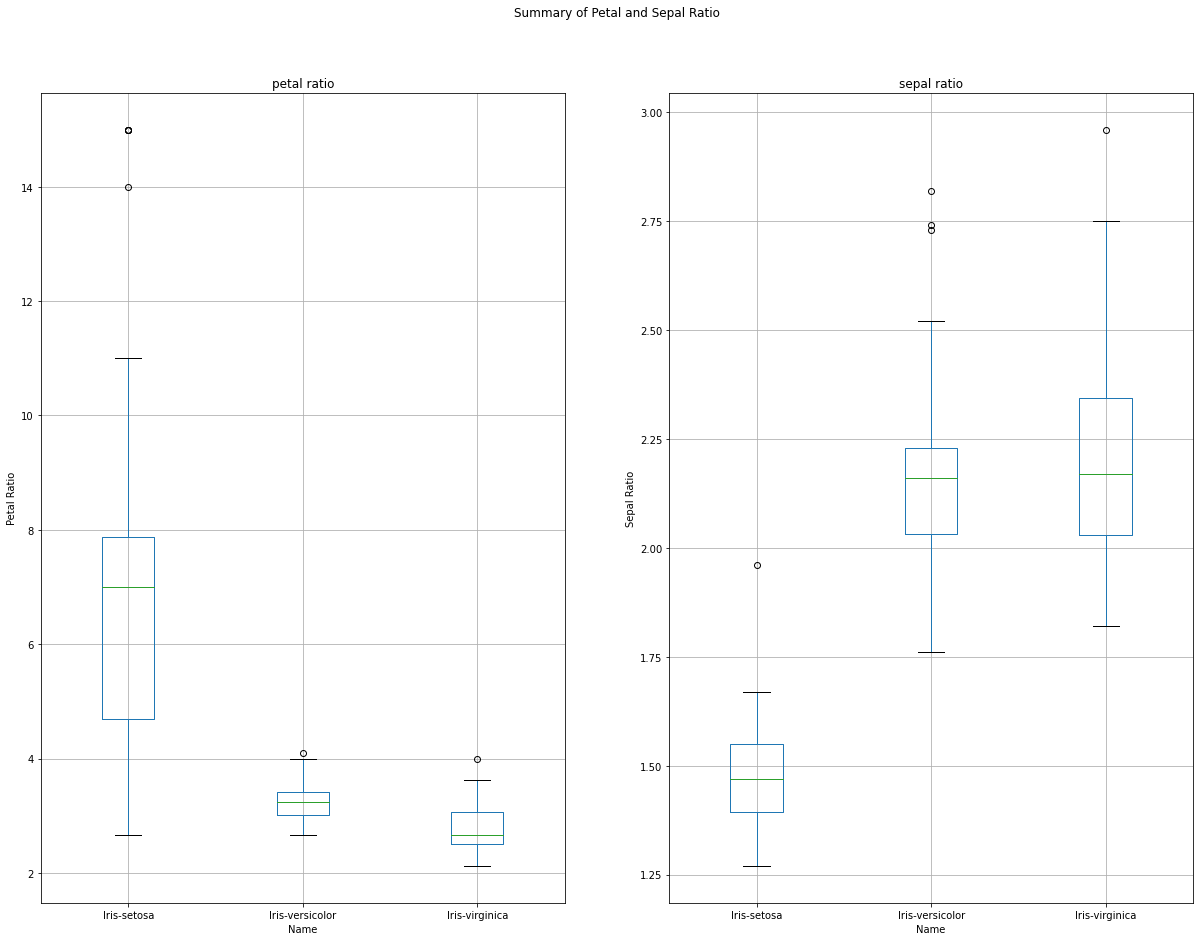

In [24]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt


iris["petal ratio"] = round(iris["PetalLength"]/iris["PetalWidth"],2)
iris["sepal ratio"] = round(iris["SepalLength"]/iris["SepalWidth"],2)

fig, ax = plt.subplots(figsize=(20,15),nrows = 1,ncols = 2,sharey = False)
axs = iris.boxplot(column=["petal ratio","sepal ratio"],by="Name",figsize=(20,15),ax=ax)

axs[0].set_ylabel('Petal Ratio')
axs[1].set_ylabel('Sepal Ratio')

fig.suptitle('Summary of Petal and Sepal Ratio')


#### Q23: Use the built-in pandas plotting tools to make a scatter matrix plot for the four original features (petal width, petal length, sepal width and sepal length). Each point in the scatter plot should be colored according to its species. Hint: see the documentation at https://pandas.pydata.org/pandas-docs/stable/visualization.html# scatter-matrix-plot to get started.

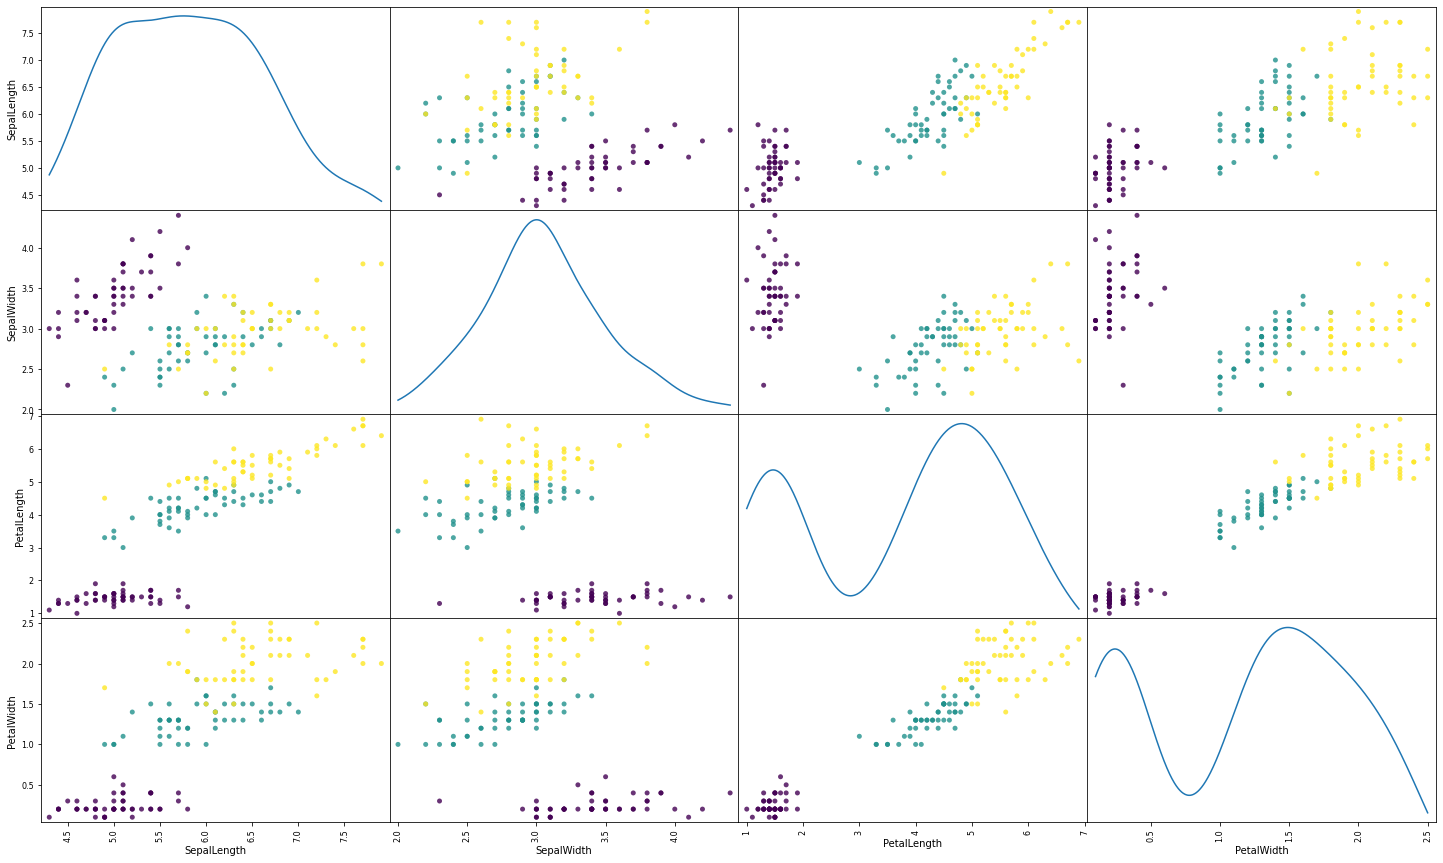

In [25]:
#Data Preparation
conditions = [(iris["Name"] == "Iris-setosa"),(iris["Name"] == "Iris-versicolor"),(iris["Name"] == "Iris-virginica")]
outputs = [0,1,2]

iris["temp_name"] = np.select(conditions,outputs)


plot = pd.plotting.scatter_matrix(iris[["SepalLength","SepalWidth","PetalLength","PetalWidth"]],
                           c=iris["temp_name"], figsize=[25,15], s=100, alpha=0.8,diagonal='kde')

#plt.imshow(np.unique(iris["temp_name"]))
#plt.xticks(ticks=np.unique(iris["temp_name"]),labels=iris["Name"].unique())


## Load the stockprice dataset

In [26]:
stock = pd.read_csv("timeseries_stockprice.csv", header=0) #add header
stock

,Date,Amazon,Google,Facebook
0,5/1/18,927.800,901.94,151.740
1,5/2/18,946.645,909.62,153.340
2,5/3/18,946.000,914.86,153.600
3,5/4/18,944.750,926.07,150.170
4,5/7/18,940.520,933.54,151.450
5,5/8/18,940.950,926.12,150.710
6,5/9/18,952.800,936.95,151.490
7,5/10/18,953.500,931.98,150.230
8,5/11/18,945.110,925.32,150.310
9,5/14/18,954.500,931.53,150.400


#### Q24-Plotting a single series

To plot a single series, such as the closing stock price for Amazon for each date, you can simple designate the x-axis values as Date and the y-axis values as Amazon and set the kind parameter to line.

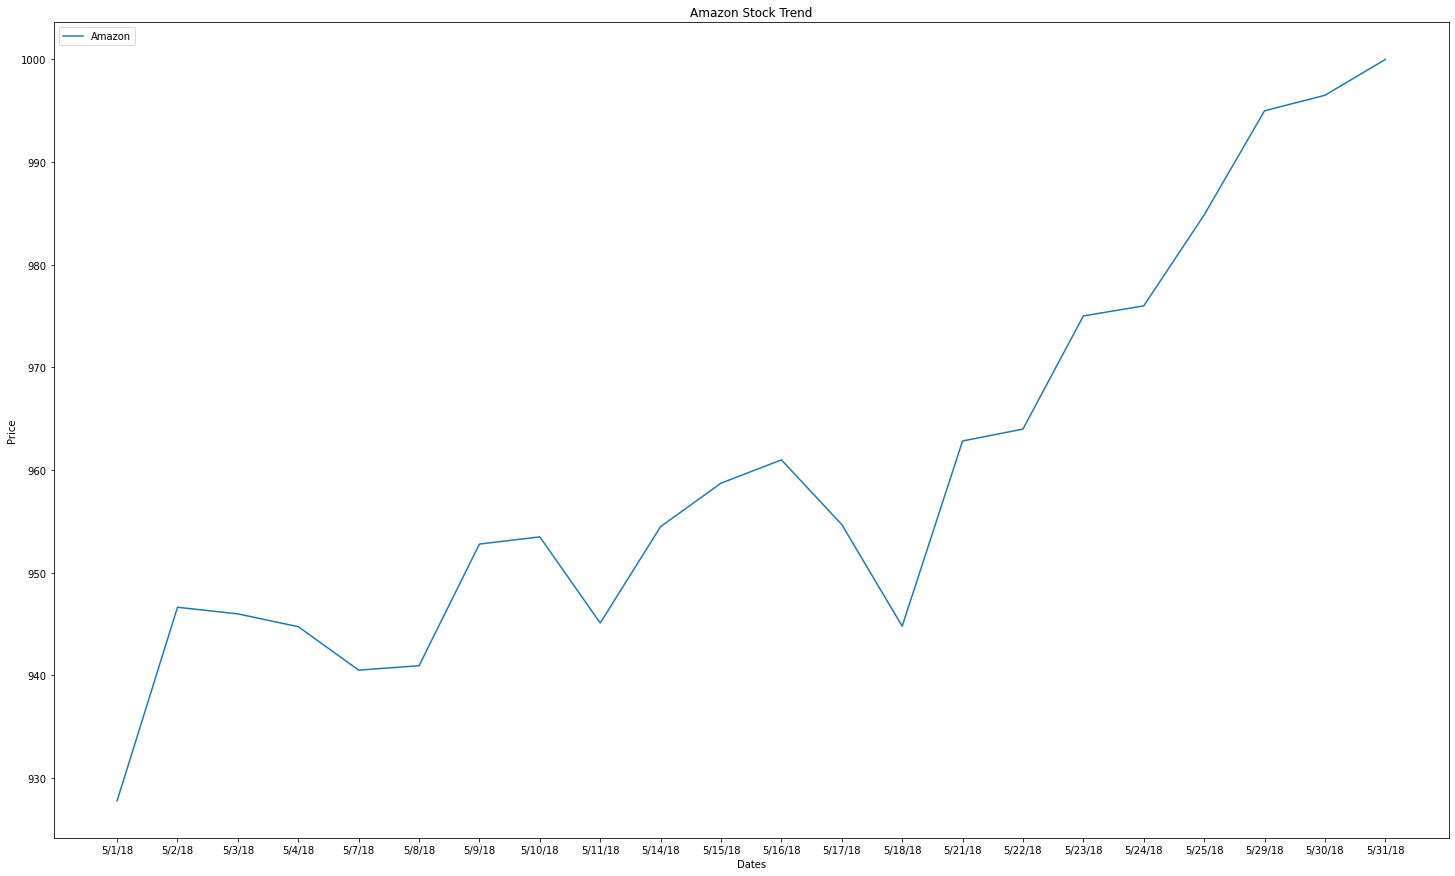

In [27]:
plt.rcParams["figure.figsize"] = (25,15)


plt.plot(stock["Date"], stock[["Amazon"]], label="Amazon")
plt.title("Amazon Stock Trend")
plt.xlabel("Dates")
plt.ylabel("Price")
plt.legend(loc='upper left')


plt.show()

#### Q25-Plotting two series

When plotting two series, set the y-axis values to a list containing the two column names, each being a data series.

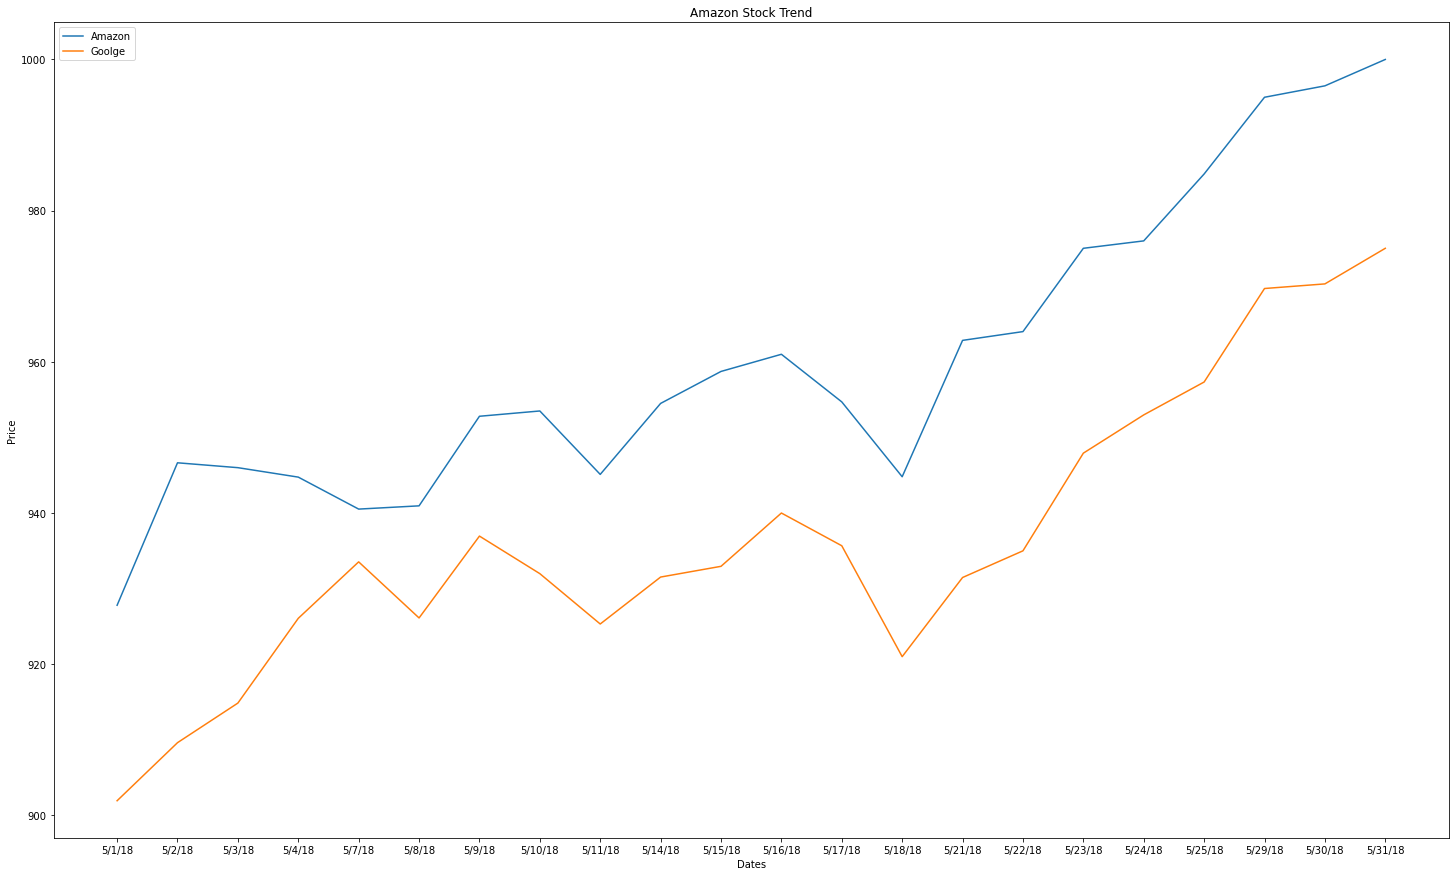

In [28]:
plt.rcParams["figure.figsize"] = (25,15)


plt.plot(stock["Date"], stock[["Amazon"]], label="Amazon")
plt.plot(stock["Date"], stock[["Google"]], label="Goolge")
plt.title("Amazon Stock Trend")
plt.xlabel("Dates")
plt.ylabel("Price")
plt.legend(loc='upper left')


plt.show()

#### Q26- Plotting three series

When plotting three series, set the y-axis values to a list containing the three column names, each being a data series.

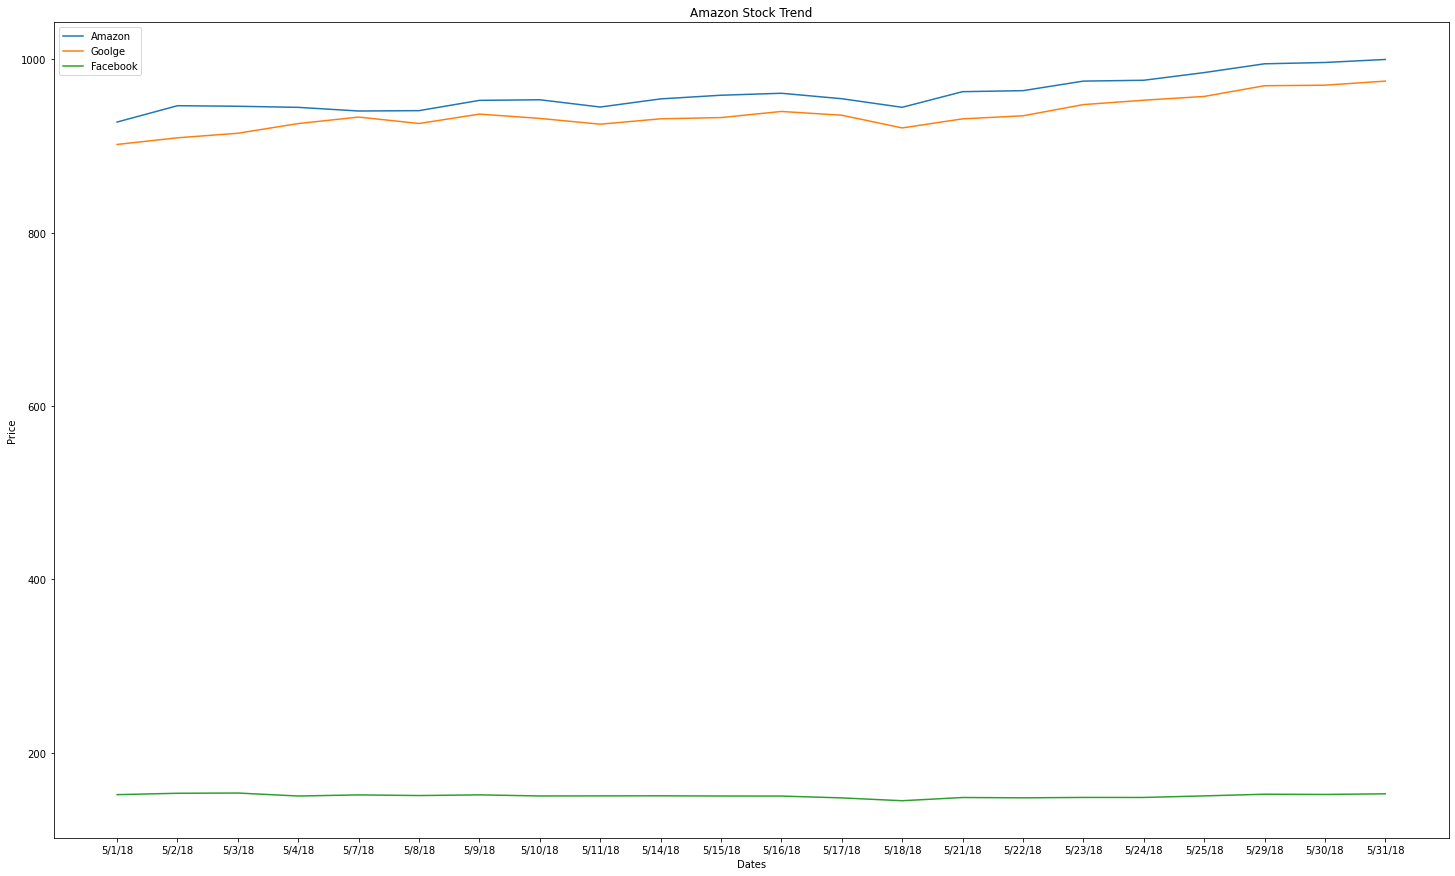

In [29]:
plt.rcParams["figure.figsize"] = (25,15)


plt.plot(stock["Date"], stock[["Amazon"]], label="Amazon")
plt.plot(stock["Date"], stock[["Google"]], label="Goolge")
plt.plot(stock["Date"], stock[["Facebook"]], label="Facebook")
plt.title("Amazon Stock Trend")
plt.xlabel("Dates")
plt.ylabel("Price")
plt.legend(loc='upper left')


plt.show()

## Load the following dataset

In [30]:
import pandas as pd
mydata = pd.read_csv("mba.csv", header=0, index_col ="School") #add header and index
mydata.head()

,Rank,Country,Average_salary,Pre_Salary,Grad_Jobs,PhD,Avg_Age_Students,Avg_Work_Experience,Tuition,Duration
School,,,,,,,,,,
Chicago (Booth),1,US,113217,63,93,96,27,60,106800,21
Dartmouth (Tuck),2,US,115143,62,97,100,28,60,106980,21
Virginia (Darden),3,US,104478,67,95,97,27,60,107800,21
Harvard,4,US,121785,44,97,94,27,48,107000,18
Columbia,5,US,113340,55,98,97,28,60,111736,20


#### Q27-Plot the Box plot using both approach available in pandas: 

    * .plot
    * .boxplot

<AxesSubplot:>

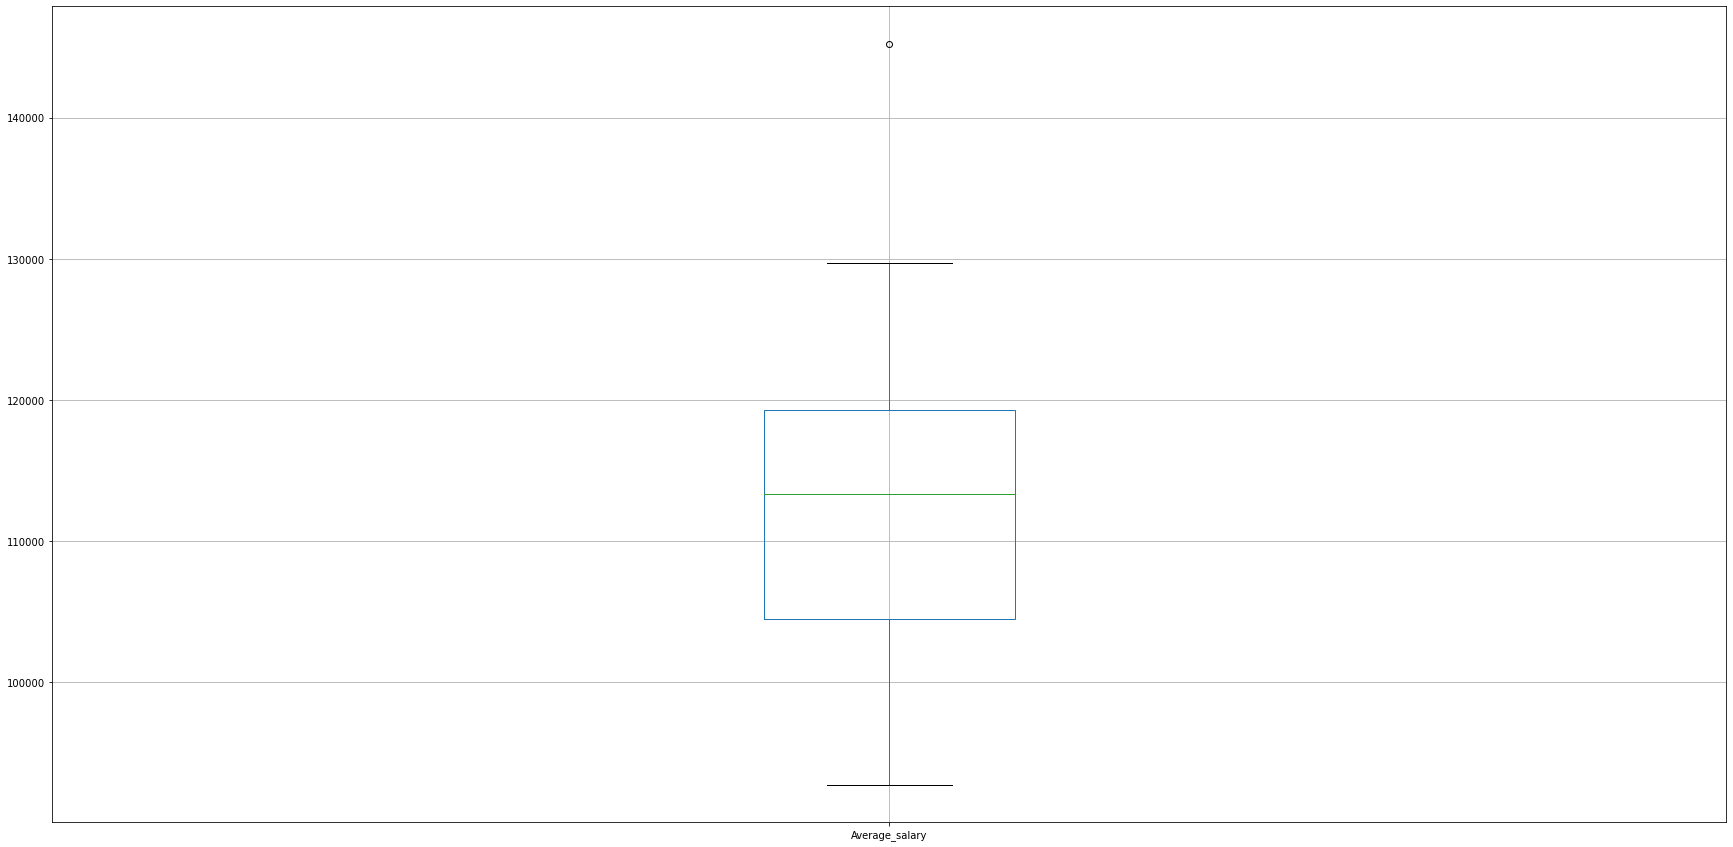

In [31]:
#With boxplot function
mydata.boxplot("Average_salary",figsize= (30,15),grid= True)

<AxesSubplot:>

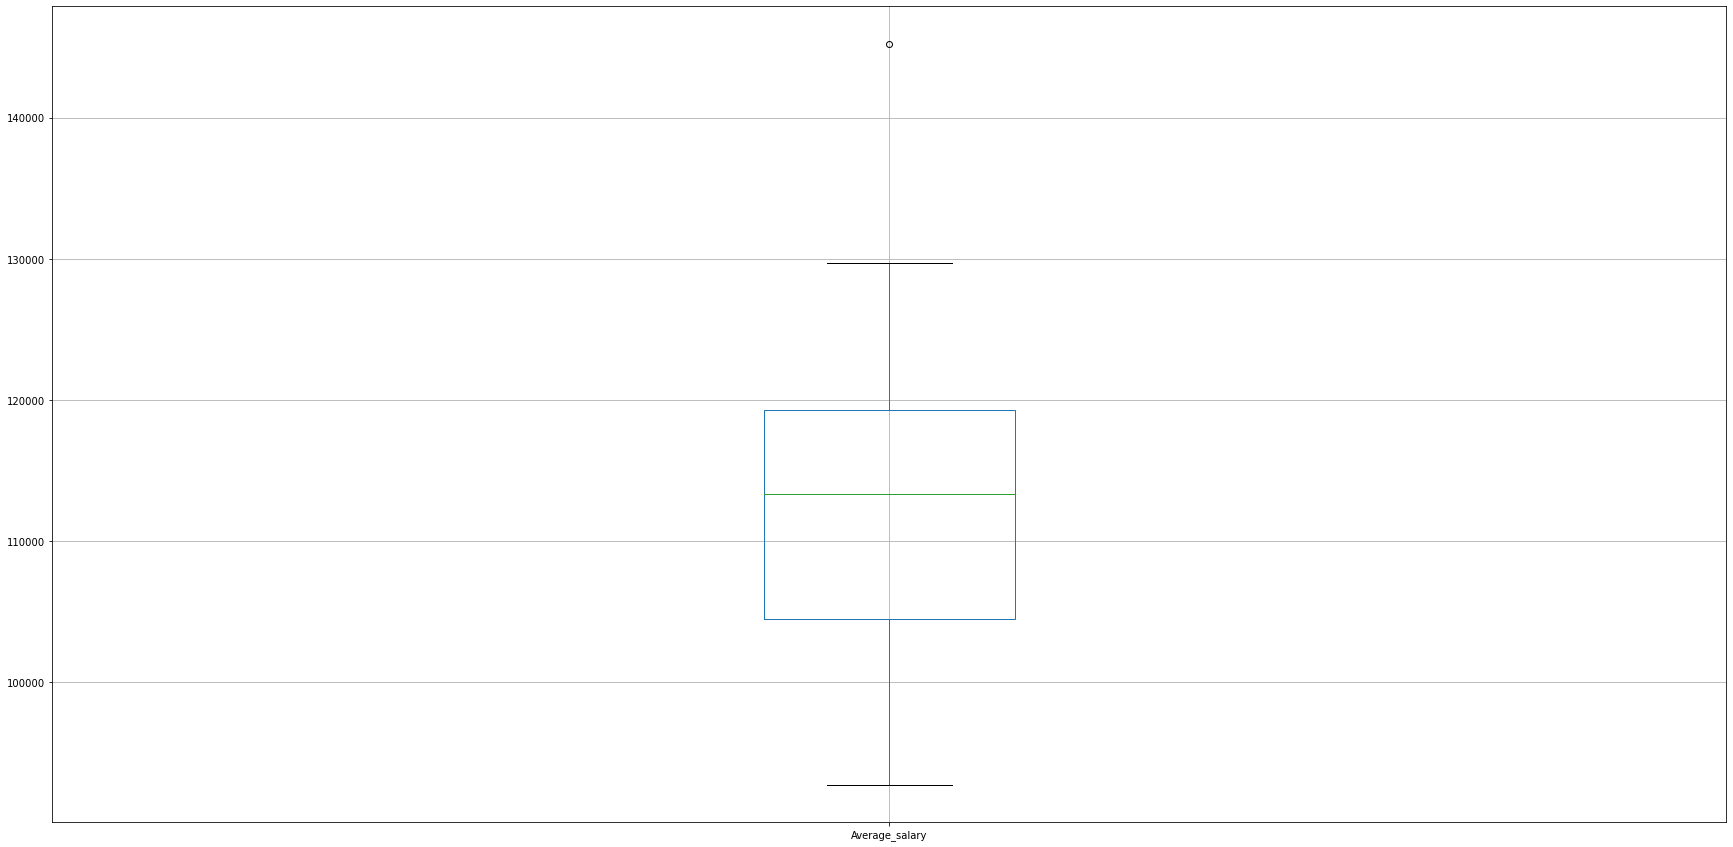

In [32]:
#With .plot function
mydata["Average_salary"].plot(kind="box",figsize= (30,15),grid= True)

#### Q28- creat a box plot of two variables: "the average student" and "average work experience" in one graph (side by side)

<AxesSubplot:>

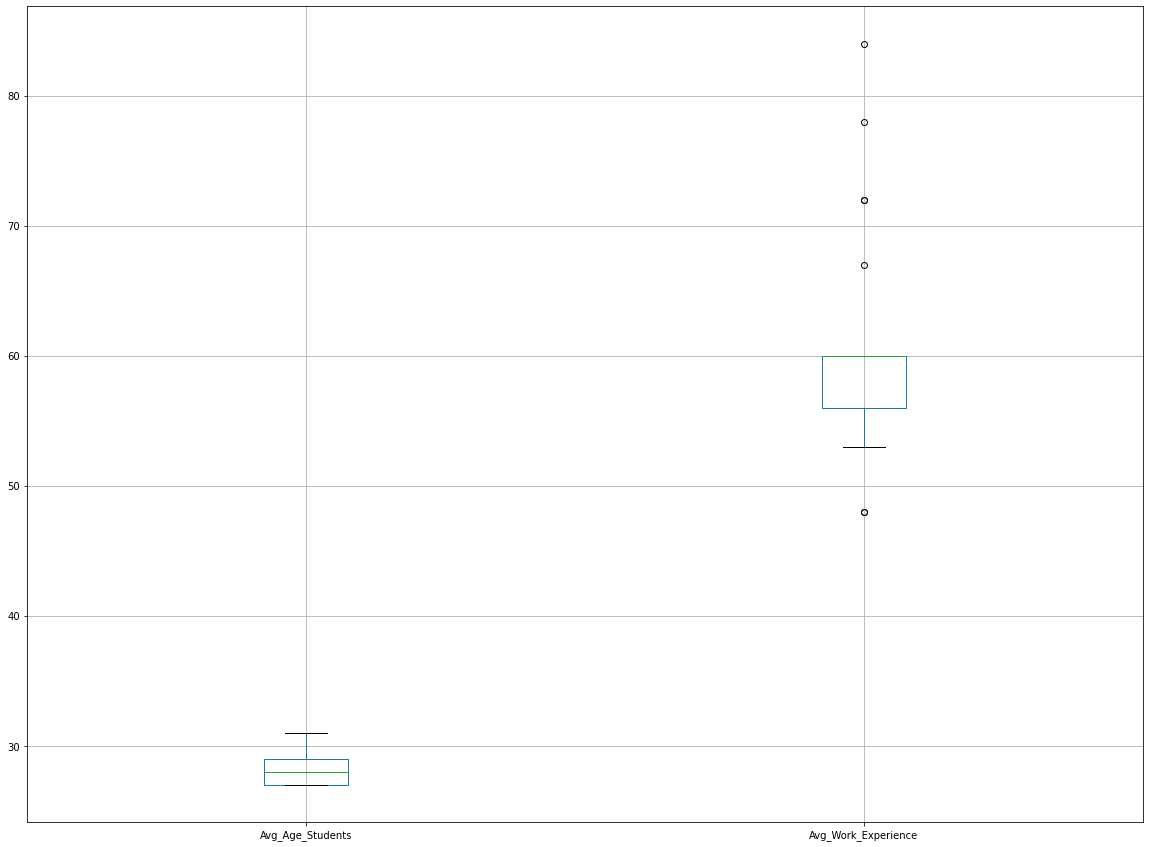

In [33]:
mydata[["Avg_Age_Students","Avg_Work_Experience"]].plot(kind="box",figsize= (20,15),grid = True)

#### Q29- Formatting with .boxplot().
change the following parameters for the previous question as grid=False and fontsize=14:

<AxesSubplot:>

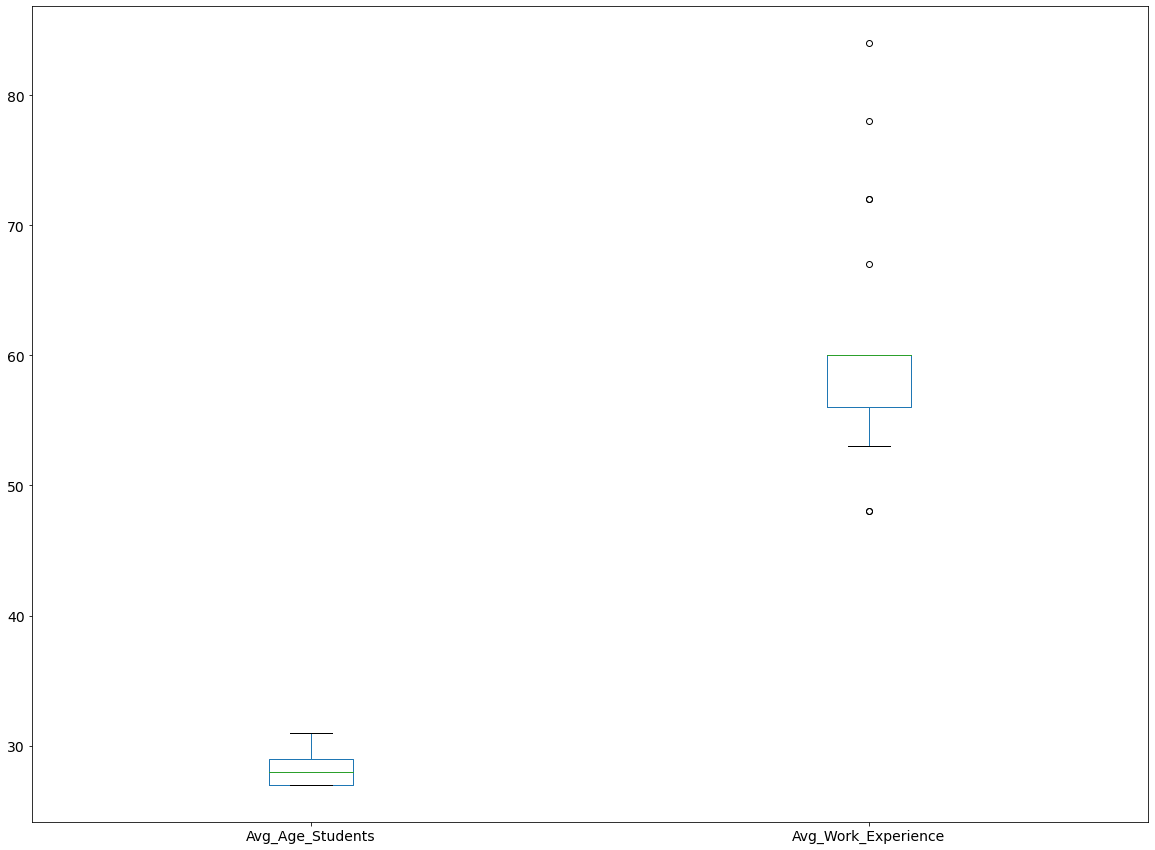

In [34]:
mydata[["Avg_Age_Students","Avg_Work_Experience"]].boxplot(figsize= (20,15),grid=False,fontsize = 14)

#### Q30-Histograms
plot the histogram of Tuitions with proper bins

<AxesSubplot:>

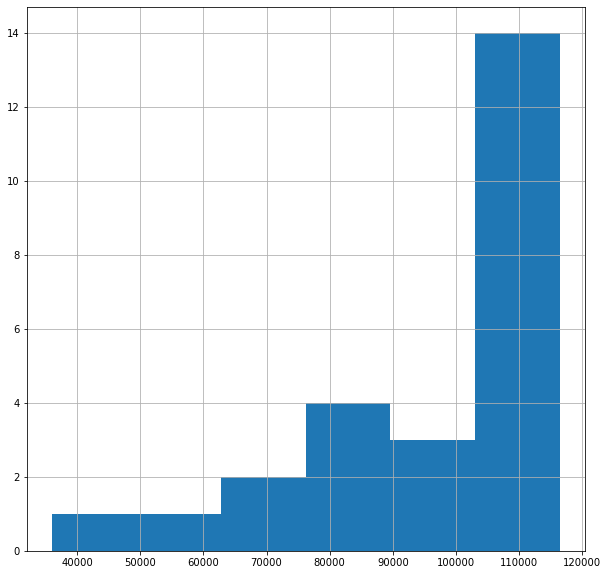

In [35]:
mydata["Tuition"].hist(bins='auto',figsize = (10,10))

#### Q31-Scatter plots
plot the scatter plot using Rank (x-axis) and Grad_job (y-axis) and set the proper xlim

<AxesSubplot:xlabel='Rank', ylabel='Grad_Jobs'>

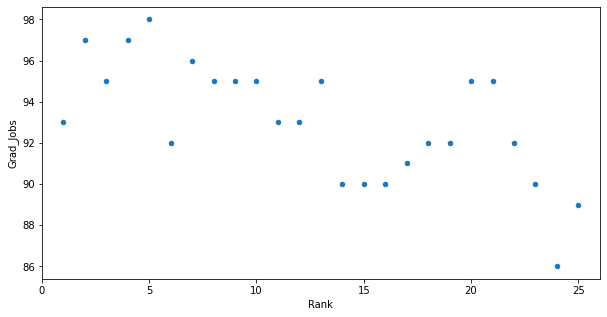

In [36]:
#max(mydata["Rank"])
mydata.plot(x="Rank", y = "Grad_Jobs",kind="scatter",xlim = (0,26),figsize = (10,5))

#### Q32-Bar charts
plot horrizontal bar graph for Tuition and assign a proper title for your graph - sort your bar graphs in ascending order

<AxesSubplot:title={'center':'Bar Plot of Tuition'}, ylabel='School'>

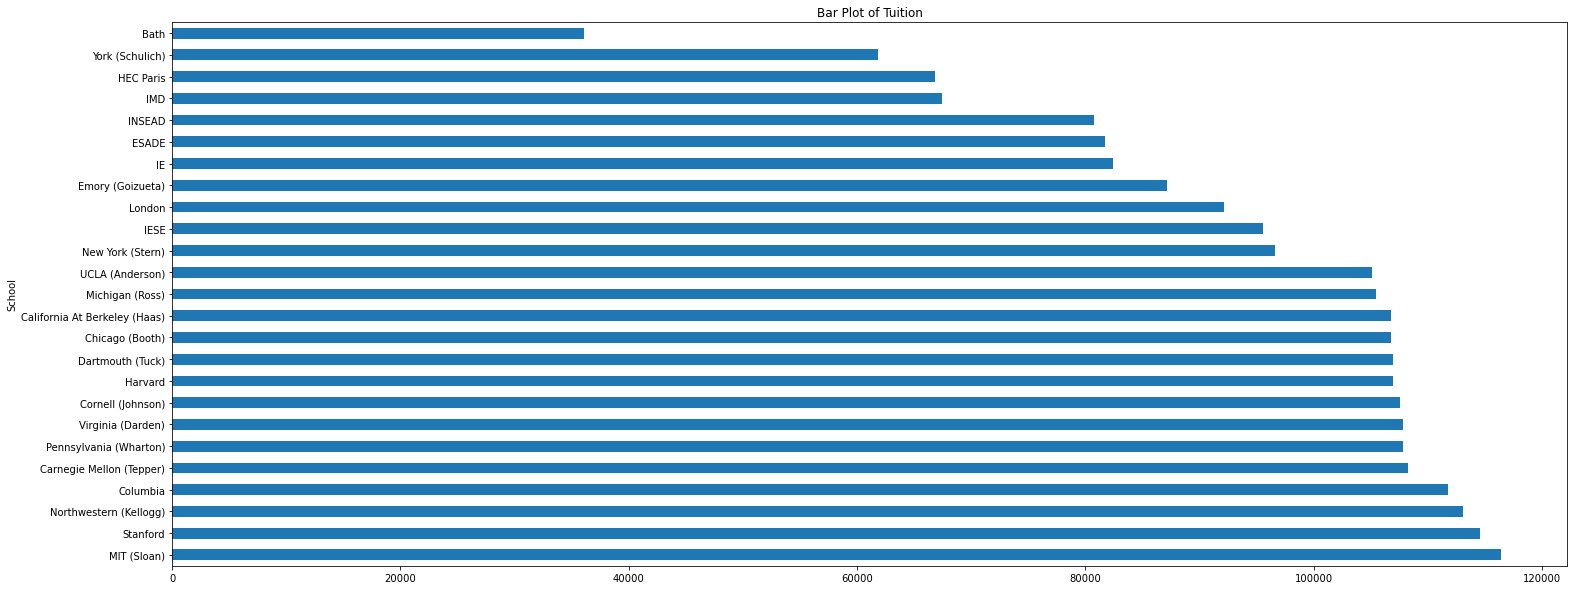

In [37]:
mydata.sort_values('Tuition',ascending=False)["Tuition"].plot.barh(figsize = (25,10),title = "Bar Plot of Tuition")

### Q33-Refine the bar chart with a few aesthetic elements.


* The legend parameter is set to False to remove the redundant legend.
* The color parameter can set the color values using RGB. RGB is a way of making colors. You have to provide an amount of red, green and blue + the transparency and it returns a color.
* The edgecolor parameter allows you to set the border of the bars.

<AxesSubplot:title={'center':'Bar Plot of Tuition'}, ylabel='School'>

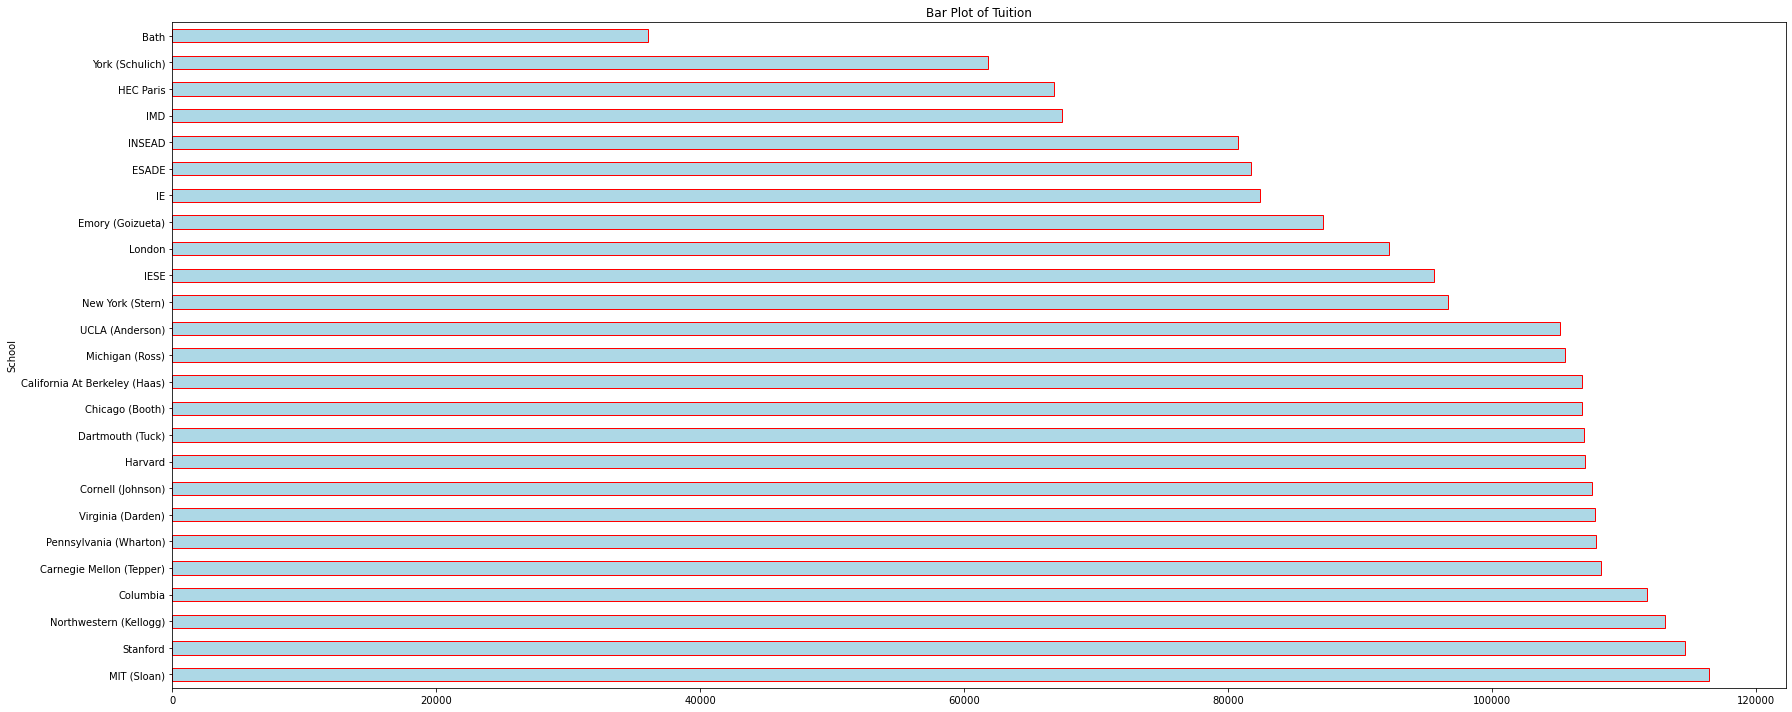

In [38]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

mydata.sort_values('Tuition',ascending=False)["Tuition"].plot.barh(figsize = (25,10),title = "Bar Plot of Tuition",
                                                                   legend = False ,color = '#ADD8E6',edgecolor = "red" )